In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy.typing

In [ ]:
!pip install -U numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy pandas setuptools cython matplotlib pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 6.1 MB/s eta 0:00:00


In [ ]:
import os
os.system('git clone https://github.com/facebook/prophet.git')
os.chdir('prophet')
os.system('python setup.py install')

512

In [ ]:
!pip install pystan==2.19.1.1
!pip install convertdate
!pip install lunarcalendar
!pip install holidays==0.10.5
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826700 sha256=d6ad4b75b991ccef35ec9329d880475eb3f937408a812ab8e0833870e309562f
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement holidays==0.10.5 (from versions: 0.1, 0.2, 0.3, 0.3.1, 0.4, 0.4.1, 0.5, 0.6, 0.7, 0.8, 0.8.1, 0.9.3, 0.9.4, 0.9.5, 0.9.6

In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 1.1.0 which is incompatible.


In [ ]:
import pandas as pd
import numpy.typing
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [ ]:
df_no_pattern = pd.read_csv('/content/drive/MyDrive/daily_data_clean.csv')
df_no_pattern = df_no_pattern[['ds', 'y']]

In [ ]:
df_no_pattern.describe()

,y
count,2115.000000
mean,7.233333
std,1.018746
min,4.850000
25%,6.565000
50%,7.300000
75%,7.870000
max,9.630000


In [ ]:
df_no_pattern['y'].median()

7.3

In [ ]:
df_no_pattern['y'].var()

1.037843046357616

In [ ]:
df_no_pattern['y'].skew()

-0.12471433968084754

In [ ]:
df_no_pattern['y'].kurt()

-0.2382066596628194

In [ ]:
def plot_df(df2, x, y, title="Unemployment rate from 2006 to 2023", xlabel="Date", ylabel="Estimated unemployment rate", dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

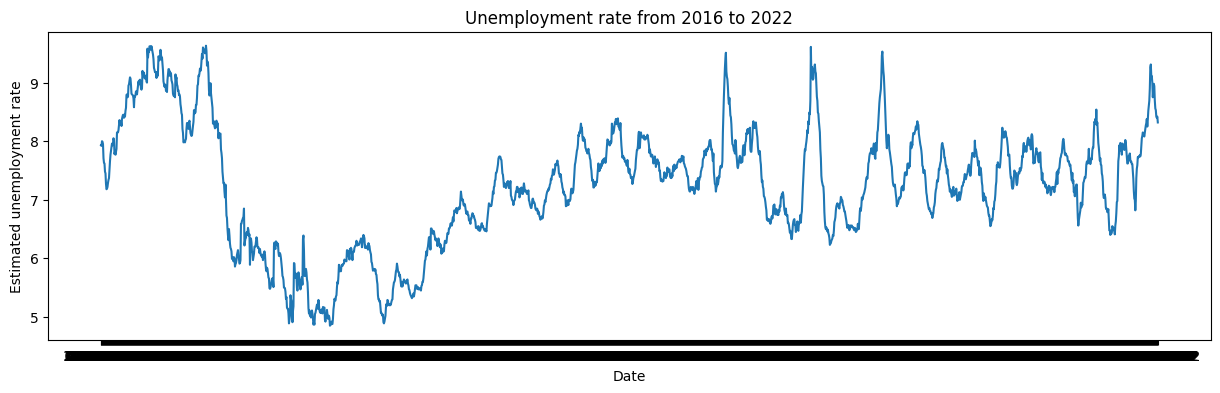

In [ ]:
plot_df(df_no_pattern, x=df_no_pattern['ds'], y=df_no_pattern['y'], title='Unemployment rate from 2016 to 2022')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_no_pattern['y'])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -4.054340
p-value: 0.001151
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568


In [ ]:
from statsmodels.tsa.stattools import kpss

result = kpss(df_no_pattern['y'])

print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 0.809835
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [ ]:
train = df_no_pattern.iloc[:len(df_no_pattern)-365]
train

,ds,y
0,29-01-2016,7.93
1,30-01-2016,7.92
2,31-01-2016,8.00
3,01-02-2016,7.99
4,02-02-2016,7.95
...,...,...
1745,27-12-2021,7.77
1746,28-12-2021,7.77
1747,29-12-2021,7.73
1748,30-12-2021,8.01


In [ ]:
test = df_no_pattern.iloc[len(df_no_pattern)-365:]
test

,ds,y
1750,01-01-2022,7.86
1751,02-01-2022,7.82
1752,03-01-2022,7.74
1753,04-01-2022,7.72
1754,05-01-2022,7.63
...,...,...
2110,27-12-2022,8.53
2111,28-12-2022,8.42
2112,29-12-2022,8.40
2113,30-12-2022,8.42


In [ ]:
numpy.float = float
numpy.int = int

In [ ]:
# Fit the Prophet models to the full data
model_no_pattern = Prophet()
model_no_pattern.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/3wudzfsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/2wg1ucq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91453', 'data', 'file=/tmp/tmpyy7gvq1n/3wudzfsg.json', 'init=/tmp/tmpyy7gvq1n/2wg1ucq_.json', 'output', 'file=/tmp/tmpyy7gvq1n/prophet_modelxrsb88ti/prophet_model-20230505055126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:51:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:51:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
from pandas import date_range
future = model_no_pattern.make_future_dataframe(periods=365, freq='D') #MS for monthly, H for hourly
forecast_no_pattern = model_no_pattern.predict(future)
forecast_no_pattern

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-02,8.769974,8.047063,9.645325,8.769974,8.769974,0.041359,0.041359,0.041359,-0.029133,-0.029133,-0.029133,0.070491,0.070491,0.070491,0.0,0.0,0.0,8.811332
1,2016-01-03,8.768041,8.004323,9.620310,8.768041,8.768041,0.035954,0.035954,0.035954,-0.013050,-0.013050,-0.013050,0.049005,0.049005,0.049005,0.0,0.0,0.0,8.803996
2,2016-01-04,8.766109,7.980598,9.580858,8.766109,8.766109,0.032110,0.032110,0.032110,0.005133,0.005133,0.005133,0.026978,0.026978,0.026978,0.0,0.0,0.0,8.798220
3,2016-01-05,8.764177,7.955228,9.586863,8.764177,8.764177,0.034889,0.034889,0.034889,0.030280,0.030280,0.030280,0.004609,0.004609,0.004609,0.0,0.0,0.0,8.799065
4,2016-01-06,8.762245,8.021393,9.545972,8.762245,8.762245,-0.010688,-0.010688,-0.010688,0.007226,0.007226,0.007226,-0.017914,-0.017914,-0.017914,0.0,0.0,0.0,8.751557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,2022-12-27,7.238319,6.260798,8.681374,6.339992,8.125684,0.202970,0.202970,0.202970,0.030280,0.030280,0.030280,0.172690,0.172690,0.172690,0.0,0.0,0.0,7.441289
2111,2022-12-28,7.237984,6.239723,8.626566,6.334789,8.130551,0.165773,0.165773,0.165773,0.007226,0.007226,0.007226,0.158547,0.158547,0.158547,0.0,0.0,0.0,7.403757
2112,2022-12-29,7.237648,6.245826,8.550901,6.331797,8.135417,0.149879,0.149879,0.149879,0.007284,0.007284,0.007284,0.142594,0.142594,0.142594,0.0,0.0,0.0,7.387527
2113,2022-12-30,7.237313,6.043263,8.577034,6.327974,8.140159,0.117317,0.117317,0.117317,-0.007739,-0.007739,-0.007739,0.125056,0.125056,0.125056,0.0,0.0,0.0,7.354629


In [ ]:
last_365_days_forecast = forecast_no_pattern.tail(365)
last_365_days_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1750,2022-01-01,7.359083,6.647139,8.172388,7.359083,7.359083,0.051834,0.051834,0.051834,-0.029133,-0.029133,-0.029133,0.080967,0.080967,0.080967,0.0,0.0,0.0,7.410917
1751,2022-01-02,7.358747,6.600587,8.209817,7.358747,7.358747,0.046778,0.046778,0.046778,-0.013050,-0.013050,-0.013050,0.059829,0.059829,0.059829,0.0,0.0,0.0,7.405525
1752,2022-01-03,7.358412,6.587566,8.219060,7.358412,7.358412,0.043179,0.043179,0.043179,0.005133,0.005133,0.005133,0.038046,0.038046,0.038046,0.0,0.0,0.0,7.401591
1753,2022-01-04,7.358076,6.651892,8.189865,7.358076,7.358076,0.046104,0.046104,0.046104,0.030280,0.030280,0.030280,0.015824,0.015824,0.015824,0.0,0.0,0.0,7.404180
1754,2022-01-05,7.357741,6.586981,8.243893,7.357741,7.357741,0.000582,0.000582,0.000582,0.007226,0.007226,0.007226,-0.006644,-0.006644,-0.006644,0.0,0.0,0.0,7.358323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2110,2022-12-27,7.238319,6.260798,8.681374,6.339992,8.125684,0.202970,0.202970,0.202970,0.030280,0.030280,0.030280,0.172690,0.172690,0.172690,0.0,0.0,0.0,7.441289
2111,2022-12-28,7.237984,6.239723,8.626566,6.334789,8.130551,0.165773,0.165773,0.165773,0.007226,0.007226,0.007226,0.158547,0.158547,0.158547,0.0,0.0,0.0,7.403757
2112,2022-12-29,7.237648,6.245826,8.550901,6.331797,8.135417,0.149879,0.149879,0.149879,0.007284,0.007284,0.007284,0.142594,0.142594,0.142594,0.0,0.0,0.0,7.387527
2113,2022-12-30,7.237313,6.043263,8.577034,6.327974,8.140159,0.117317,0.117317,0.117317,-0.007739,-0.007739,-0.007739,0.125056,0.125056,0.125056,0.0,0.0,0.0,7.354629


In [ ]:
last_365_days_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
1750,2022-01-01,7.410917,6.647139,8.172388
1751,2022-01-02,7.405525,6.600587,8.209817
1752,2022-01-03,7.401591,6.587566,8.219060
1753,2022-01-04,7.404180,6.651892,8.189865
1754,2022-01-05,7.358323,6.586981,8.243893
...,...,...,...,...
2110,2022-12-27,7.441289,6.260798,8.681374
2111,2022-12-28,7.403757,6.239723,8.626566
2112,2022-12-29,7.387527,6.245826,8.550901
2113,2022-12-30,7.354629,6.043263,8.577034


In [ ]:
last_365_days_forecast['yhat'].values

array([7.41091692, 7.40552536, 7.40159075, 7.40417994, 7.35832251,
       7.33551157, 7.297722  , 7.25381987, 7.24779059, 7.24438609,
       7.24858146, 7.20531226, 7.18597727, 7.15245852, 7.11353209,
       7.11309742, 7.11582524, 7.12661472, 7.090331  , 7.07830793,
       7.05236776, 7.02123157, 7.02874798, 7.03954041, 7.05846353,
       7.03034006, 7.02646288, 7.00861407, 6.9854749 , 7.00085416,
       7.01933521, 7.04573239, 7.02482792, 7.02787426, 7.01661356,
       6.9996882 , 7.02086968, 7.04470642, 7.07598088, 7.0594472 ,
       7.06633425, 7.05836581, 7.04417157, 7.06751657, 7.09294929,
       7.1252589 , 7.10921297, 7.11606032, 7.10755089, 7.09234626,
       7.11424845, 7.1378473 , 7.16797686, 7.14945216, 7.15357118,
       7.14213367, 7.1238508 , 7.14257308, 7.16293687, 7.18982019,
       7.16807889, 7.16904817, 7.15456121, 7.13335875, 7.14931701,
       7.1670945 , 7.19158812, 7.16766985, 7.16668883, 7.15049061,
       7.12782731, 7.14258629, 7.15943746, 7.18328995, 7.15902

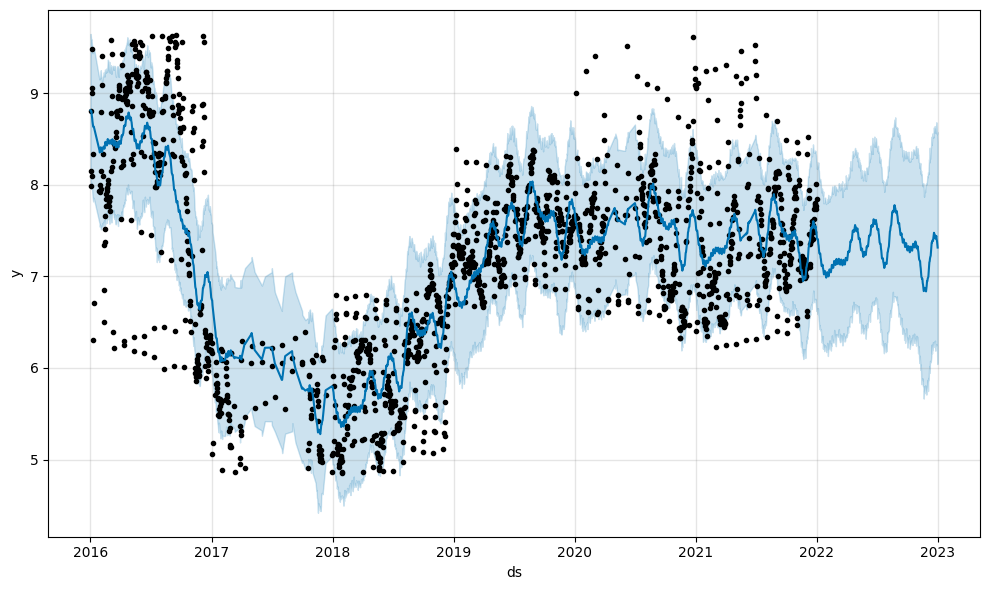

In [ ]:
plot1=model_no_pattern.plot(forecast_no_pattern)

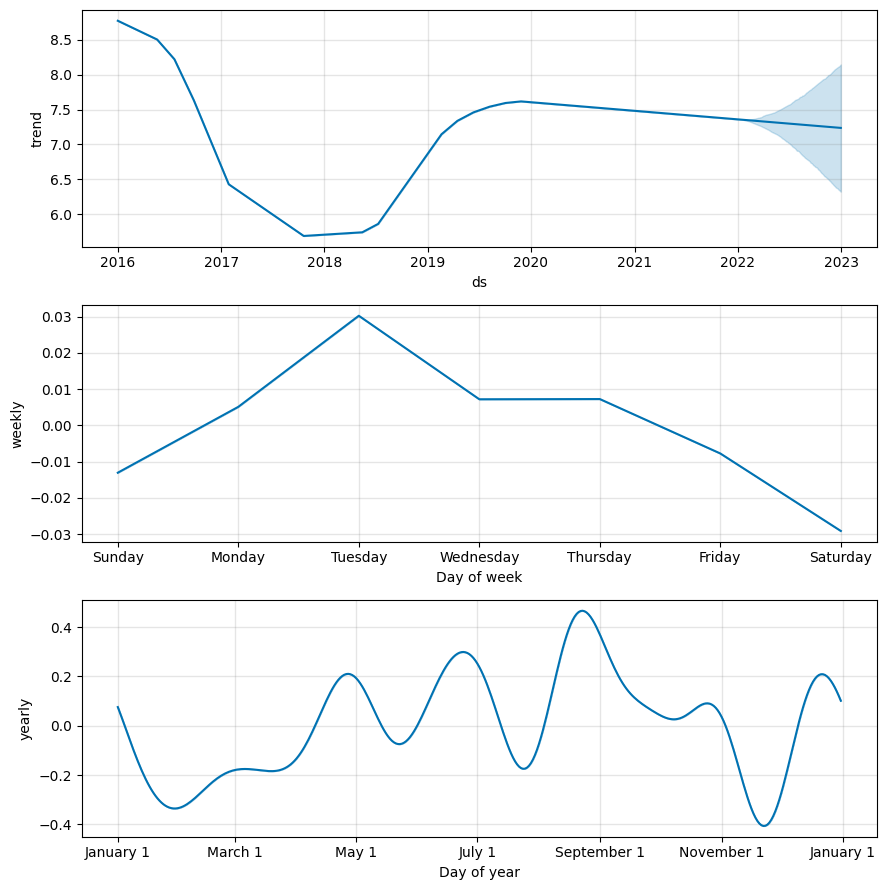

In [ ]:
plot2=model_no_pattern.plot_components(forecast_no_pattern)

In [ ]:
forecast_no_pattern[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-02,8.811332,8.047063,9.645325
1,2016-01-03,8.803996,8.004323,9.620310
2,2016-01-04,8.798220,7.980598,9.580858
3,2016-01-05,8.799065,7.955228,9.586863
4,2016-01-06,8.751557,8.021393,9.545972
...,...,...,...,...
2110,2022-12-27,7.441289,6.260798,8.681374
2111,2022-12-28,7.403757,6.239723,8.626566
2112,2022-12-29,7.387527,6.245826,8.550901
2113,2022-12-30,7.354629,6.043263,8.577034


In [ ]:
plot_plotly(model_no_pattern ,forecast_no_pattern)

In [ ]:
from statsmodels.tools.eval_measures import rmse
predictions = forecast_no_pattern.iloc[-365:]['yhat']
predictions

1750    7.410917
1751    7.405525
1752    7.401591
1753    7.404180
1754    7.358323
          ...   
2110    7.441289
2111    7.403757
2112    7.387527
2113    7.354629
2114    7.314002
Name: yhat, Length: 365, dtype: float64

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  0.5721457128621137
Mean Value of Test Dataset: 7.55868493150685


In [ ]:
# Calculate the residual
residual = test['y'] - predictions
residual

1750    0.449083
1751    0.414475
1752    0.338409
1753    0.315820
1754    0.271677
          ...   
2110    1.088711
2111    1.016243
2112    1.012473
2113    1.065371
2114    1.005998
Length: 365, dtype: float64

In [ ]:
import numpy as np
# Use least squares to fit a line to the residuals
x = np.arange(len(residual))
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, residual, rcond=None)[0]

# Adjust the predicted values
y_pred = predictions + m * x + c
y_pred

1750    7.462193
1751    7.457953
1752    7.455170
1753    7.458910
1754    7.414204
          ...   
2110    7.907006
2111    7.870625
2112    7.855546
2113    7.823800
2114    7.784324
Name: yhat, Length: 365, dtype: float64

In [ ]:
rmse_ls = rmse(test['y'], y_pred)
print("RMSE: ", rmse_ls)

RMSE:  0.49459167299925455


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_ls = mean_absolute_error(test['y'], y_pred)
print("MAE: ", mae_ls)

MAE:  0.38563709335823687


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape_ls = mean_absolute_percentage_error(test['y'], y_pred)
print("MAPE: ", mape_ls)

MAPE:  0.051501797761574306


In [ ]:
predicted=pd.DataFrame({'ds': test['ds'], 'y_pred': y_pred})
predicted

,ds,y_pred
1750,01-01-2022,7.462193
1751,02-01-2022,7.457953
1752,03-01-2022,7.455170
1753,04-01-2022,7.458910
1754,05-01-2022,7.414204
...,...,...
2110,27-12-2022,7.907006
2111,28-12-2022,7.870625
2112,29-12-2022,7.855546
2113,30-12-2022,7.823800


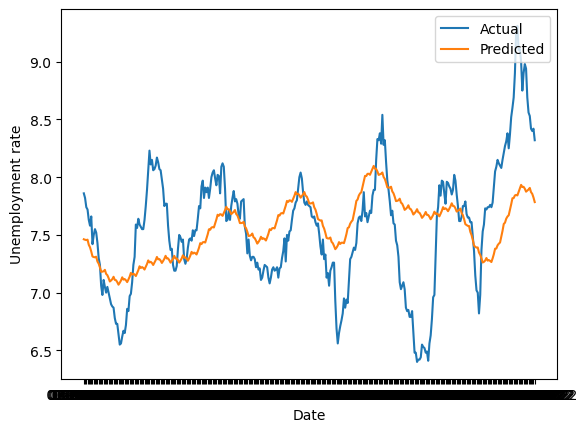

In [ ]:
# Plot the actual vs. predicted values
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(predicted['ds'], predicted['y_pred'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Unemployment rate')
plt.legend(loc='upper right')
plt.show()

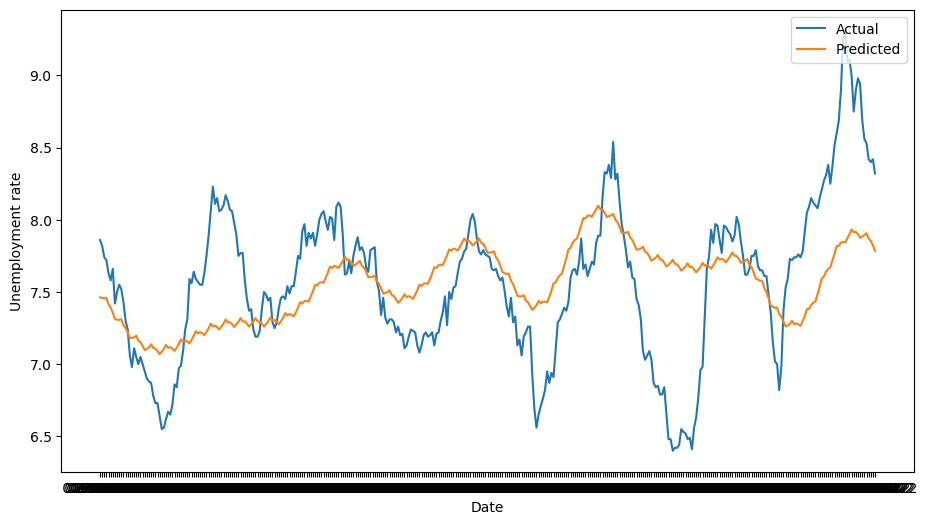

In [ ]:
fig, ax = plt.subplots(figsize=(11, 6))

ax.plot(test['ds'], test['y'], label='Actual')
ax.plot(predicted['ds'], predicted['y_pred'], label='Predicted')

ax.legend(loc='upper right')
ax.set_xlabel('Date')
ax.set_ylabel('Unemployment rate')

plt.show()

In [ ]:
y_pred_future = model_no_pattern.predict(pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=30, freq='D')}))
y_pred_future

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-01,7.236642,6.452937,8.107304,7.236642,7.236642,0.073075,0.073075,0.073075,-0.013050,-0.013050,-0.013050,0.086126,0.086126,0.086126,0.0,0.0,0.0,7.309717
1,2023-01-02,7.236306,6.417218,8.125460,7.236306,7.236306,0.070314,0.070314,0.070314,0.005133,0.005133,0.005133,0.065182,0.065182,0.065182,0.0,0.0,0.0,7.306621
2,2023-01-03,7.235971,6.465033,8.108312,7.235971,7.235971,0.073820,0.073820,0.073820,0.030280,0.030280,0.030280,0.043541,0.043541,0.043541,0.0,0.0,0.0,7.309791
3,2023-01-04,7.235635,6.410637,8.061257,7.235635,7.235635,0.028636,0.028636,0.028636,0.007226,0.007226,0.007226,0.021410,0.021410,0.021410,0.0,0.0,0.0,7.264271
4,2023-01-05,7.235300,6.392416,8.046613,7.235300,7.235300,0.006270,0.006270,0.006270,0.007284,0.007284,0.007284,-0.001014,-0.001014,-0.001014,0.0,0.0,0.0,7.241570
5,2023-01-06,7.234964,6.417286,8.063175,7.234964,7.234964,-0.031287,-0.031287,-0.031287,-0.007739,-0.007739,-0.007739,-0.023548,-0.023548,-0.023548,0.0,0.0,0.0,7.203677
6,2023-01-07,7.234629,6.340392,7.909710,7.234629,7.234629,-0.075152,-0.075152,-0.075152,-0.029133,-0.029133,-0.029133,-0.046019,-0.046019,-0.046019,0.0,0.0,0.0,7.159477
7,2023-01-08,7.234294,6.377308,7.997446,7.234294,7.234294,-0.081321,-0.081321,-0.081321,-0.013050,-0.013050,-0.013050,-0.068271,-0.068271,-0.068271,0.0,0.0,0.0,7.152972
8,2023-01-09,7.233958,6.428854,7.989830,7.233958,7.233958,-0.085026,-0.085026,-0.085026,0.005133,0.005133,0.005133,-0.090158,-0.090158,-0.090158,0.0,0.0,0.0,7.148932
9,2023-01-10,7.233623,6.309384,7.962250,7.233623,7.233623,-0.081273,-0.081273,-0.081273,0.030280,0.030280,0.030280,-0.111553,-0.111553,-0.111553,0.0,0.0,0.0,7.152349


In [ ]:
y_pred_future = y_pred_future[['yhat','yhat_lower', 'yhat_upper']][:30]
y_pred_future

,yhat,yhat_lower,yhat_upper
0,7.309717,6.452937,8.107304
1,7.306621,6.417218,8.125460
2,7.309791,6.465033,8.108312
3,7.264271,6.410637,8.061257
4,7.241570,6.392416,8.046613
5,7.203677,6.417286,8.063175
6,7.159477,6.340392,7.909710
7,7.152972,6.377308,7.997446
8,7.148932,6.428854,7.989830
9,7.152349,6.309384,7.962250


In [ ]:
# Forecast the next 30 days values
x_future = np.arange(len(predictions), len(predictions) + 30)
#y_pred_future = model_no_pattern.predict(pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=30, freq='D')}))
y_pred = y_pred_future['yhat'][:30] + m * x_future + c
y_pred

0     7.781190
1     7.779245
2     7.783566
3     7.739198
4     7.717647
5     7.680906
6     7.637857
7     7.632504
8     7.629615
9     7.634183
10    7.591161
11    7.571962
12    7.538483
13    7.499515
14    7.498969
15    7.501528
16    7.512102
17    7.475565
18    7.463260
19    7.437017
20    7.405566
21    7.412763
22    7.423237
23    7.441851
24    7.413435
25    7.409287
26    7.391198
27    7.367856
28    7.383076
29    7.401451
Name: yhat, dtype: float64

In [ ]:
# Forecast the next 30 days values
#x_future = np.arange(len(predictions), len(predictions) + 30)
#y_pred_future = model_no_pattern.predict(pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=30, freq='D')}))
yhat_lower = y_pred_future['yhat_lower'][:30] + m * x_future + c
yhat_lower

0     6.924410
1     6.889842
2     6.938809
3     6.885563
4     6.868494
5     6.894515
6     6.818772
7     6.856840
8     6.909537
9     6.791218
10    6.816451
11    6.779264
12    6.757596
13    6.709013
14    6.754218
15    6.761038
16    6.731596
17    6.655226
18    6.685196
19    6.607824
20    6.578881
21    6.620433
22    6.630185
23    6.573607
24    6.588292
25    6.575466
26    6.579386
27    6.540591
28    6.517813
29    6.592630
Name: yhat_lower, dtype: float64

In [ ]:
# Forecast the next 30 days values
#x_future = np.arange(len(predictions), len(predictions) + 30)
#y_pred = model_no_pattern.predict(pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=30, freq='D')}))
yhat_upper = y_pred_future['yhat_upper'][:30] + m * x_future + c
yhat_upper

0     8.578777
1     8.598084
2     8.582088
3     8.536184
4     8.522691
5     8.540404
6     8.388090
7     8.476977
8     8.470513
9     8.444084
10    8.411019
11    8.426766
12    8.384599
13    8.301067
14    8.332108
15    8.303985
16    8.342826
17    8.261666
18    8.247528
19    8.249244
20    8.200081
21    8.257254
22    8.290258
23    8.268955
24    8.197232
25    8.190414
26    8.208296
27    8.185118
28    8.136747
29    8.185013
Name: yhat_upper, dtype: float64

In [ ]:
predicted_future = pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=30, freq='D'), 'y_pred': y_pred,'y_lower': yhat_lower,'y_upper': yhat_upper})
predicted_future['ds'] = predicted_future['ds'].dt.strftime('%Y-%m-%d')
predicted_future

,ds,y_pred,y_lower,y_upper
0,2023-01-01,7.781190,6.924410,8.578777
1,2023-01-02,7.779245,6.889842,8.598084
2,2023-01-03,7.783566,6.938809,8.582088
3,2023-01-04,7.739198,6.885563,8.536184
4,2023-01-05,7.717647,6.868494,8.522691
5,2023-01-06,7.680906,6.894515,8.540404
6,2023-01-07,7.637857,6.818772,8.388090
7,2023-01-08,7.632504,6.856840,8.476977
8,2023-01-09,7.629615,6.909537,8.470513
9,2023-01-10,7.634183,6.791218,8.444084


In [ ]:
predicted_future = pd.concat([pd.DataFrame({'ds': pd.date_range(start='2023-01-01', periods=30, freq='D')}),
                              pd.DataFrame({'y_pred': y_pred}),
                              pd.DataFrame({'y_lower': yhat_lower}),
                              pd.DataFrame({'y_upper': yhat_upper})], axis=1)
predicted_future['ds'] = predicted_future['ds'].dt.strftime('%Y-%m-%d')
predicted_future

,ds,y_pred,y_lower,y_upper
0,2023-01-01,7.781190,6.924410,8.578777
1,2023-01-02,7.779245,6.889842,8.598084
2,2023-01-03,7.783566,6.938809,8.582088
3,2023-01-04,7.739198,6.885563,8.536184
4,2023-01-05,7.717647,6.868494,8.522691
5,2023-01-06,7.680906,6.894515,8.540404
6,2023-01-07,7.637857,6.818772,8.388090
7,2023-01-08,7.632504,6.856840,8.476977
8,2023-01-09,7.629615,6.909537,8.470513
9,2023-01-10,7.634183,6.791218,8.444084


In [ ]:
combined = pd.concat([predicted, predicted_future])
combined

,ds,y_pred,y_lower,y_upper
1750,01-01-2022,7.462193,NaN,NaN
1751,02-01-2022,7.457953,NaN,NaN
1752,03-01-2022,7.455170,NaN,NaN
1753,04-01-2022,7.458910,NaN,NaN
1754,05-01-2022,7.414204,NaN,NaN
...,...,...,...,...
25,2023-01-26,7.409287,6.575466,8.190414
26,2023-01-27,7.391198,6.579386,8.208296
27,2023-01-28,7.367856,6.540591,8.185118
28,2023-01-29,7.383076,6.517813,8.136747


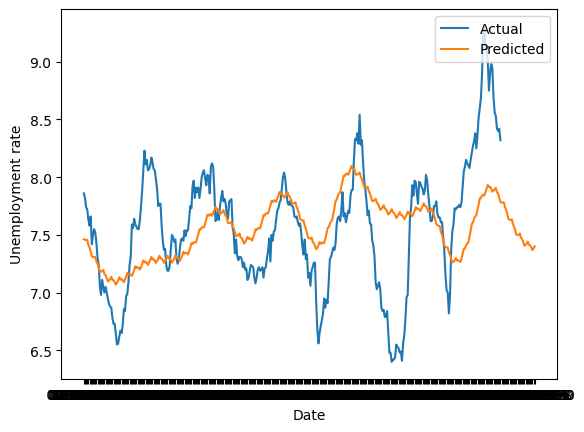

In [ ]:
# Plot the actual vs. predicted values
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(combined['ds'], combined['y_pred'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Unemployment rate')
plt.legend(loc='upper right')
plt.show()

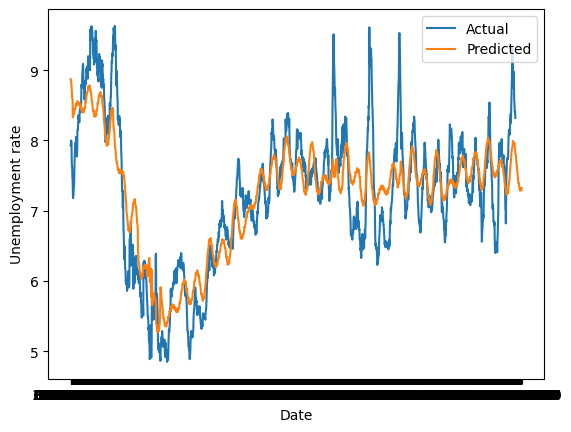

In [ ]:
# Plot the actual vs. predicted values
plt.plot(df_no_pattern['ds'], df_no_pattern['y'], label='Actual')
plt.plot(combined['ds'], combined['y_pred'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Unemployment rate')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Calculate the residual
residuals = test['y'] - y_pred
residuals

1750    0.397807
1751    0.362047
1752    0.284830
1753    0.261090
1754    0.215796
          ...   
2110    0.622994
2111    0.549375
2112    0.544454
2113    0.596200
2114    0.535676
Length: 365, dtype: float64

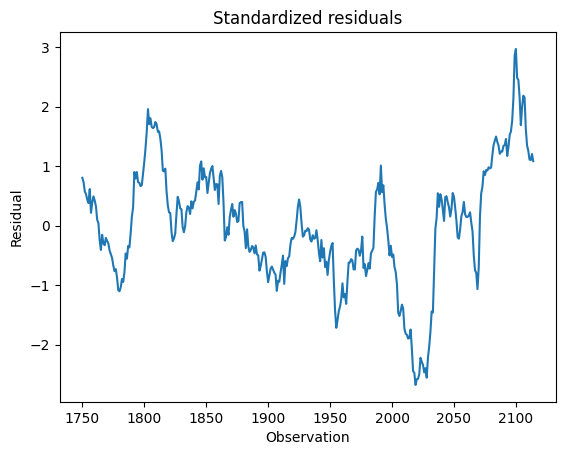

In [ ]:
# Standardize residuals
residuals_std = (residuals - np.mean(residuals)) / np.std(residuals)

# Plot standardized residuals
import matplotlib.pyplot as plt

plt.plot(residuals_std)
plt.title('Standardized residuals')
plt.xlabel('Observation')
plt.ylabel('Residual')
plt.show()


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



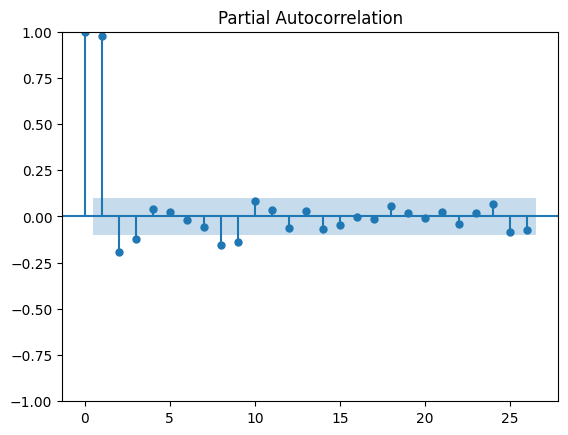

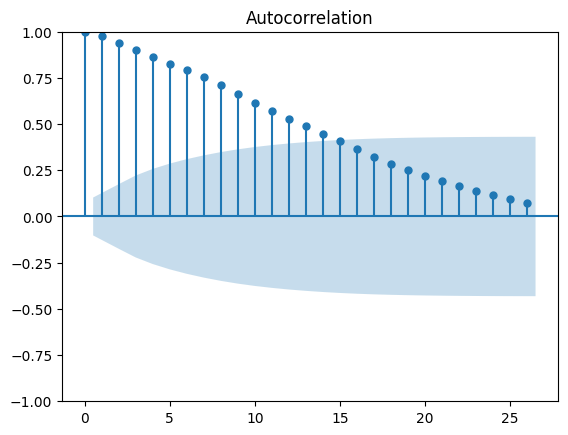

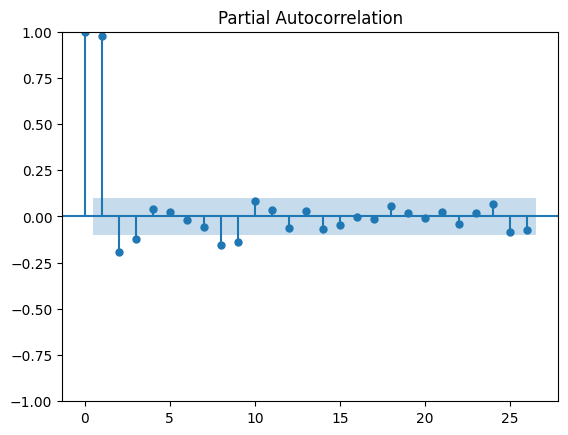

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(residuals_std)

# Plot PACF
plot_pacf(residuals_std)


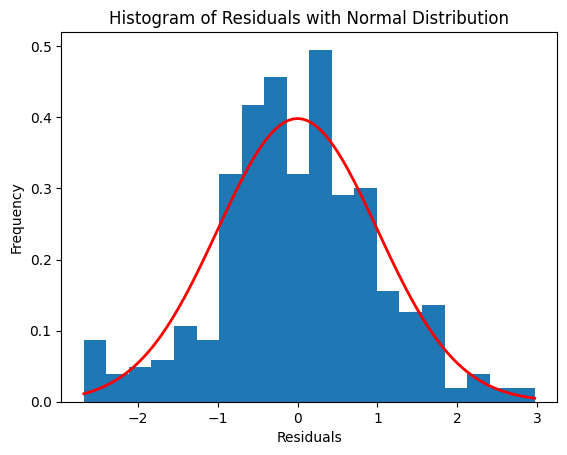

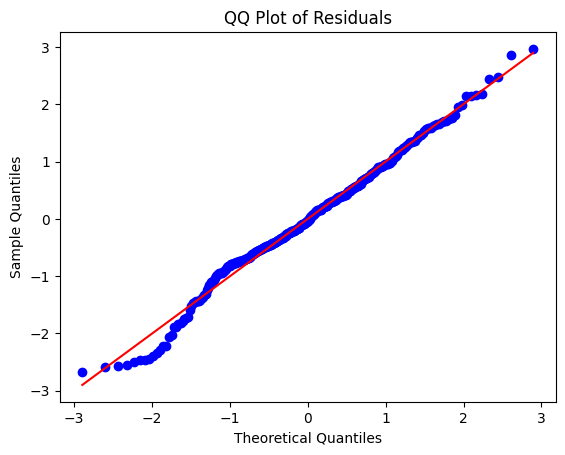

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import probplot, norm

# Plot the histogram of residuals
plt.hist(residuals_std, bins=20, density=True)

# Create a normal distribution with mean and standard deviation of the residuals
x = np.linspace(residuals_std.min(), residuals_std.max(), 100)
pdf = norm.pdf(x, loc=residuals_std.mean(), scale=residuals_std.std())

# Plot the normal distribution over the histogram
plt.plot(x, pdf, 'r', lw=2)

plt.title('Histogram of Residuals with Normal Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot the QQ plot of residuals
probplot(residuals_std, plot=plt)
plt.title('QQ Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [ ]:
from scipy.stats import shapiro, kstest

# Shapiro-Wilk test
shapiro_test = shapiro(residuals_std)
print("Shapiro-Wilk test: ", shapiro_test)

# Kolmogorov-Smirnov test
ks_test = kstest(residuals_std, 'norm')
print("Kolmogorov-Smirnov test: ", ks_test)


Shapiro-Wilk test:  ShapiroResult(statistic=0.9902145266532898, pvalue=0.015619223937392235)
Kolmogorov-Smirnov test:  KstestResult(statistic=0.055372349376858976, pvalue=0.20530204764561777, statistic_location=-0.7916703451320549, statistic_sign=-1)


In [ ]:
from scipy.stats import jarque_bera

jb_test = jarque_bera(residuals_std)
jb_test
print('Jarque-Bera test statistic: ', jb_test[0])
print('Jarque-Bera p-value: ', jb_test[1])

Jarque-Bera test statistic:  2.50172233814253
Jarque-Bera p-value:  0.28625817399759707


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(residuals_std)

,lb_stat,lb_pvalue
1,349.355663,5.854010e-78
2,675.802901,1.783465e-147
3,976.143396,2.693370e-211
4,1252.078437,8.164258e-270
5,1505.835762,0.000000e+00
6,1738.962059,0.000000e+00
7,1951.830043,0.000000e+00
8,2142.121269,0.000000e+00
9,2307.679756,0.000000e+00
10,2450.933635,0.000000e+00


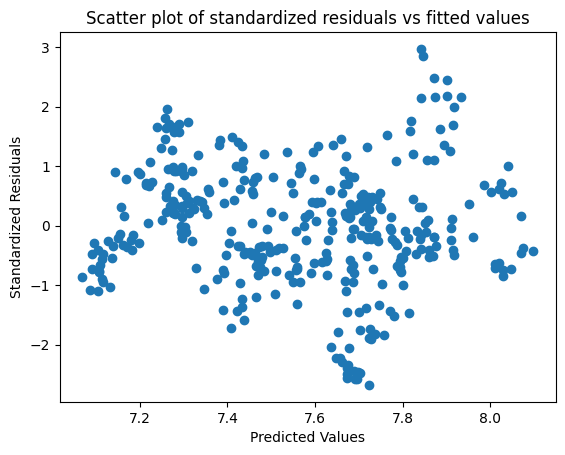

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the scatter plot
plt.scatter(y_pred, residuals_std)
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.title('Scatter plot of standardized residuals vs fitted values')
plt.show()

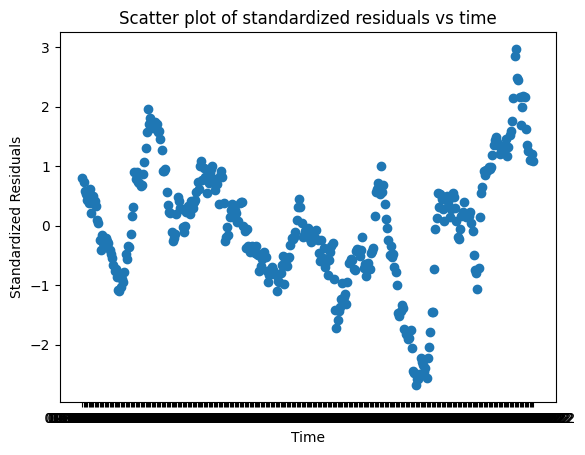

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the scatterplot
ax.scatter(test['ds'], residuals_std)

# Set the x-label
ax.set_xlabel("Time")

# Set the y-label
ax.set_ylabel("Standardized Residuals")
plt.title('Scatter plot of standardized residuals vs time')
# Show the plot
plt.show()


In [ ]:
df_cv = cross_validation(model_no_pattern, initial='730', period='180 days', horizon='365 days')
df_cv.head()

In [ ]:
# Calculate performance metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,35 days,0.511889,0.715464,0.548975,0.079602,0.061192,0.083170,0.755848
1,36 days,0.513743,0.716759,0.551864,0.080113,0.062360,0.083759,0.756892
2,37 days,0.519030,0.720438,0.556504,0.081112,0.062360,0.084686,0.751253
3,38 days,0.539482,0.734495,0.568661,0.082739,0.064567,0.086461,0.746241
4,39 days,0.542018,0.736219,0.570189,0.083054,0.064567,0.086871,0.747076


In [ ]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [ ]:
# Perform cross-validation
cv_results = cross_validation(model_no_pattern, horizon='365 days')

# Calculate performance metrics
df_p = performance_metrics(cv_results)

# Calculate residuals
residuals = df_cv['y'] - df_cv['yhat']

# Calculate Portmanteau lack of fit test
lbvalue, pvalue = acorr_ljungbox(residuals, lags=10)

# Print results
print('Ljung-Box Test')
print('Lagrange multiplier statistic: {:.2f}'.format(lbvalue[-1]))
print('p-value: {:.4f}'.format(pvalue[-1]))

INFO:prophet:Making 5 forecasts with cutoffs between 2019-01-01 00:00:00 and 2020-12-31 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/4j9iiuo2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/vblelqrw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9169', 'data', 'file=/tmp/tmpyy7gvq1n/4j9iiuo2.json', 'init=/tmp/tmpyy7gvq1n/vblelqrw.json', 'output', 'file=/tmp/tmpyy7gvq1n/prophet_modelakmc17kp/prophet_model-20230505070101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:01:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:01:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/aosbdfhk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/xm49rc8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

AttributeError: ignored

In [ ]:
# Perform cross-validation on the model
df_cv = cross_validation(model_no_pattern, period='180 days', horizon='30 days')

# Compute performance metrics for the cross-validated forecasts
df_p = performance_metrics(df_cv)
df_p
# Extract the p-value of the Portmanteau lack-of-fit test from the performance metrics dataframe
#p_value = df_p['p_value'].values[0]

INFO:prophet:Making 10 forecasts with cutoffs between 2017-06-25 00:00:00 and 2021-12-01 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/8tn5kr8w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/u50yuyc8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46724', 'data', 'file=/tmp/tmpyy7gvq1n/8tn5kr8w.json', 'init=/tmp/tmpyy7gvq1n/u50yuyc8.json', 'output', 'file=/tmp/tmpyy7gvq1n/prophet_modelmwnn97qu/prophet_model-20230505071513.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/sybheq10.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyy7gvq1n/vp7lyphr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,0.512179,0.715667,0.624570,0.087644,0.080396,0.087057,0.829545
1,4 days,0.441153,0.664193,0.588346,0.082678,0.076898,0.082619,0.863636
2,5 days,0.425859,0.652579,0.590065,0.082666,0.077426,0.083245,0.857143
3,6 days,0.423791,0.650992,0.587880,0.082624,0.092316,0.083564,0.812500
4,7 days,0.372407,0.610251,0.541644,0.077574,0.078830,0.078360,0.818182
5,8 days,0.396103,0.629367,0.543731,0.079726,0.081077,0.081827,0.795455
6,9 days,0.459632,0.677962,0.579697,0.087620,0.066603,0.091463,0.732955
7,10 days,0.574708,0.758095,0.650525,0.099943,0.103888,0.105812,0.636364
8,11 days,0.612087,0.782360,0.648485,0.098770,0.103888,0.104159,0.568182
9,12 days,0.869203,0.932311,0.738847,0.113431,0.113775,0.120417,0.506494
